In [1]:
# importing the required liabraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the file and reading the file
import os 
os.chdir("D:\Simplilearn\Machine Learning\Biomedical  Project\Chronic Kidney Disease")

CKD=pd.read_csv("kidney_disease.csv")

In [3]:
# checking the data 
CKD.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# checking the shape of the data
print(CKD.shape)

(400, 26)


In [5]:
# checking the types of data present in the CKD data
CKD.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [6]:
# dropping the id column from the dataset
CKD= CKD.drop("id",axis=1)

In [7]:
print(CKD.shape)

(400, 25)


In [8]:
CKD.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
# checking the classification (dependant) column for unique values
CKD.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [10]:
CKD.classification.head(50)

0       ckd
1       ckd
2       ckd
3       ckd
4       ckd
5       ckd
6       ckd
7       ckd
8       ckd
9       ckd
10      ckd
11      ckd
12      ckd
13      ckd
14      ckd
15      ckd
16      ckd
17      ckd
18      ckd
19      ckd
20      ckd
21      ckd
22      ckd
23      ckd
24      ckd
25      ckd
26      ckd
27      ckd
28      ckd
29      ckd
30      ckd
31      ckd
32      ckd
33      ckd
34      ckd
35      ckd
36      ckd
37    ckd\t
38      ckd
39      ckd
40      ckd
41      ckd
42      ckd
43      ckd
44      ckd
45      ckd
46      ckd
47      ckd
48      ckd
49      ckd
Name: classification, dtype: object

In [11]:
# ckd\t is error data in the dataframe it should be ckd so, replacing it with ckd
CKD['classification']=CKD['classification'].replace('ckd\t','ckd')

In [12]:
CKD.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [13]:
CKD.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [14]:
CKD.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [15]:
# checking the null values in the data
CKD.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [16]:
#dataset has the null values so, first split the data accourding to its type then fill the values

CKD_numericdata=CKD.select_dtypes(include=np.number)
CKD_objectdata=CKD.select_dtypes(include=np.object)

In [17]:
print(CKD_numericdata.shape)
print(CKD_objectdata.shape)

(400, 11)
(400, 14)


In [18]:
CKD_numericdata.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


In [19]:
# checking the null values in the numeric data
CKD_numericdata.isnull().sum().sort_values(ascending=False)

pot     88
sod     87
hemo    52
su      49
sg      47
al      46
bgr     44
bu      19
sc      17
bp      12
age      9
dtype: int64

In [20]:
# filling null values with mean with Simple Imputer
from sklearn.impute import SimpleImputer

In [21]:
si=SimpleImputer(missing_values=np.nan,strategy='mean')

In [22]:
CKD_numericdataimpute=si.fit_transform(CKD_numericdata)

In [23]:
CKD_numericlabels=CKD.select_dtypes(include=np.number).columns

In [24]:
CKD_numericdatadf=pd.DataFrame(CKD_numericdataimpute,columns=CKD_numericlabels)

In [25]:
CKD_numericdatadf.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6


In [26]:
# checking the null values if present
CKD_numericdatadf.isnull().sum().sort_values(ascending=False)

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
dtype: int64

<AxesSubplot:>

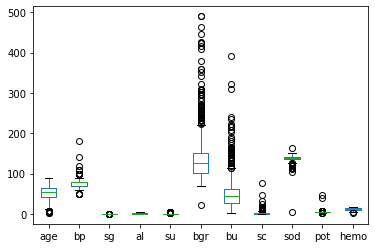

In [27]:
CKD_numericdatadf.plot(kind='box') # not removing the outliers as it is important data 

<AxesSubplot:>

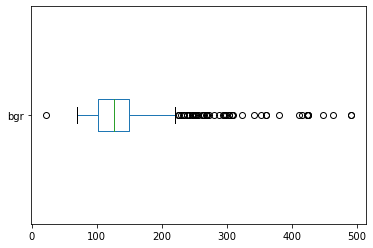

In [28]:
CKD_numericdatadf.bgr.plot(kind='box', vert=False) # it is sugar level in the blood data so, important could not remove

<AxesSubplot:>

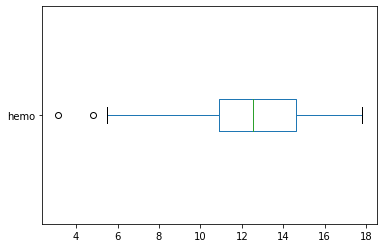

In [29]:
CKD_numericdatadf.hemo.plot(kind='box',vert=False)

In [30]:
CKD_objectdata.head()

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [31]:
# checking the null values in object data
CKD_objectdata.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pcv                70
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [32]:
# filling the missing values with most_frequent words from respective columns
si=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [33]:
CKD_objectdata=si.fit_transform(CKD_objectdata)

In [34]:
labels=CKD.select_dtypes(include=np.object).columns

In [35]:
CKD_objectdatadf=pd.DataFrame(CKD_objectdata,columns=labels)

In [36]:
CKD_objectdatadf.head()

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,38,6000,5.2,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [37]:
#converting to numeric data
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()

In [39]:
CKD_objectdatadf=CKD_objectdatadf.apply(le.fit_transform)

In [40]:
CKD_objectdatadf.head()

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,1,1,0,0,32,72,31,1,4,1,0,0,0,0
1,1,1,0,0,26,56,31,0,3,1,0,0,0,0
2,1,1,0,0,19,70,31,0,4,1,1,0,1,0
3,1,0,1,0,20,62,18,1,3,1,1,1,1,0
4,1,1,0,0,23,68,25,0,3,1,0,0,0,0


In [41]:
CKD_objectdatadf.tail()

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,1,1,0,0,35,62,28,0,3,1,0,0,0,1
396,1,1,0,0,42,72,41,0,3,1,0,0,0,1
397,1,1,0,0,37,61,33,0,3,1,0,0,0,1
398,1,1,0,0,39,67,38,0,3,1,0,0,0,1
399,1,1,0,0,41,63,40,0,3,1,0,0,0,1


In [42]:
# combing both the data
CKD=pd.concat([CKD_numericdatadf,CKD_objectdatadf],axis=1)

In [43]:
CKD.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,...,32,72,31,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,...,26,56,31,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,...,19,70,31,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,20,62,18,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,...,23,68,25,0,3,1,0,0,0,0


In [44]:
print(CKD.shape)

(400, 25)


In [45]:
# defining X as independant features and y as dependant feature 
X=CKD.drop('classification',axis=1)
y=CKD.classification

In [46]:
#spliting into train test 
from sklearn.model_selection import train_test_split

In [47]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
# applying Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression

In [49]:
LR=LogisticRegression(solver='liblinear')

In [50]:
LR.fit(Xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
LR.score(Xtrain,ytrain)

0.990625

In [52]:
pred=LR.predict(Xtrain)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytrain,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       198
           1       0.99      0.98      0.99       122

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



In [54]:
pd.crosstab(ytrain,pred)

col_0,0,1
classification,,
0,197,1
1,2,120


In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
cross_val_score(LR,Xtrain,ytrain,cv=10)

array([1.     , 0.9375 , 0.96875, 1.     , 1.     , 0.96875, 1.     ,
       1.     , 0.9375 , 0.9375 ])

In [57]:
# applying Support Vector Machine Classification algorithm
from sklearn.svm import SVC

In [58]:
svc=SVC()

In [59]:
svc.fit(Xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
svc.score(Xtrain,ytrain)

0.85625

In [61]:
cross_val_score(svc,Xtrain,ytrain,cv=10)

array([0.6875 , 0.8125 , 0.90625, 0.90625, 0.8125 , 0.96875, 0.875  ,
       0.78125, 0.84375, 0.84375])

In [62]:
# applying Random Forest Classifier algorithm
from sklearn.ensemble import RandomForestClassifier

In [63]:
RF=RandomForestClassifier()

In [64]:
RF.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
RF.score(Xtrain,ytrain) # overfitting problem with Random Forest model

1.0

In [66]:
from sklearn.naive_bayes import GaussianNB # fitting Naive Bayes algorithm

In [67]:
NB=GaussianNB()

In [68]:
NB.fit(Xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
NB.score(Xtrain,ytrain)

0.9625

In [70]:
pred=NB.predict(Xtrain)

In [71]:
print(pred)

[0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0
 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1]


In [72]:
pd.crosstab(ytrain,pred)

col_0,0,1
classification,,
0,186,12
1,0,122


In [73]:
print(classification_report(ytrain,pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       198
           1       0.91      1.00      0.95       122

    accuracy                           0.96       320
   macro avg       0.96      0.97      0.96       320
weighted avg       0.97      0.96      0.96       320



In [74]:
cross_val_score(NB,Xtrain,ytrain,cv=10)

array([0.9375 , 0.90625, 0.96875, 0.9375 , 0.9375 , 1.     , 1.     ,
       0.90625, 1.     , 0.96875])